# Texto a vectores

Antes que nada, vamos a bajar spaCy, y el modelo _es_core_news_md_. Para esto, no solo tienes que instalar la libreria spacy, sino que además bajar este modelo español, usando el comando 
> python -m spacy download en_core_web_sm

Una vez instalado, ya puedes correr estas líneas. 

In [2]:
import spacy

# Load the spacy model that you have installed
nlp = spacy.load('es_core_news_md')

Trabajemos con un texto de ejemplo. 

In [3]:
texto = ["Quizá porque mi niñez sigue jugando en tu playa", \
"Y escondido tras las cañas duerme mi primer amor", \
"Llevo tu luz y tu olor por donde quiera que vaya", \
"Y amontonado en tu arena guardo amor, juegos y penas",\
"Yo que en la piel tengo el sabor amargo del llanto eterno", \
"Que han vertido en ti cien pueblos, de Algeciras a Estambul", \
"Para que pintes de azul sus largas noches de invierno", \
"A fuerza de desventuras tu alma es profunda y oscura", \
"A tus atardeceres rojos se acostumbraron mis ojos", \
"Como el recodo al camino", \
"Soy cantor, soy embustero", \
"Me gusta el juego y el vino, tengo alma de marinero", \
"¿Qué le voy a hacer si yo nací en el Mediterráneo?", \
"Nací en el Mediterráneo"]

Por defecto, spaCy tiene una función para parsear strings y transformarlos en objetos con varias funcionalidades de procesamiento de lenguaje. Veamos como funciona. 

In [4]:
### Palabras procesadas vienen con su lemmatización
procesado = nlp(texto[0])

for token in procesado:
    print(token.text,token.lemma_)

Quizá quizá
porque porque
mi mi
niñez niñez
sigue seguir
jugando jugar
en en
tu tu
playa playa


In [5]:
### Podemos saber cuando una palabra es una stop word
procesado = nlp(texto[0])

for token in procesado:
    if token.is_stop == False:
        print(token.text,token.lemma_)

niñez niñez
jugando jugar
playa playa


In [6]:
### Podemos saber cuando una palabra es un símbolo de puntuación (desaparece la coma en este código)
procesado = nlp(texto[11])

for token in procesado:
    if token.is_punct == False:
        print(token.text,token.lemma_)

Me yo
gusta gustar
el el
juego juego
y y
el el
vino vino
tengo tener
alma alma
de de
marinero marinero


## Texto a vectores TF-IDF

Con formas de lematizar y extraer las puntuaciones y los stop words, podemos transformar una palabra en sus vectores tf-idf. Partimos creando una función para transformar un string, generando lemmatizaciones, y removiendo stopwords, espacios y puntuación. 

In [7]:
def spacy_tokenizer_esp(documento):
    resultado = []
    procesado = nlp(documento)
    for token in procesado: 
        if (token.is_stop == False and token.is_punct == False and token.lemma_.strip()!=''):
            resultado.append(token.lemma_)
    return resultado



In [8]:
spacy_tokenizer_esp(texto[0])

['niñez', 'jugar', 'playa']

Ahora vamos a crear un vectorizador (de la clase TfidfVectorizer de sklearn) pero que use nuestro tokenizador en español. 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(input = 'content', tokenizer = spacy_tokenizer_esp)

In [19]:
procesado = tfidf_vectorizer.fit_transform(texto)
procesado

<14x52 sparse matrix of type '<class 'numpy.float64'>'
	with 63 stored elements in Compressed Sparse Row format>

Esto está comprimido, pues para datasets con un monton de documentos, casi todas las entradas van a ser cero. Pero son 14 documentos (en nuestro caso, frases) y 52 palabras. La cantidad de elementos distintos de cero son 63. Veamos esto como un dataframe, transformando a una representación densa. 

In [17]:
import pandas as pd

denso = procesado.todense()
denso = denso.tolist()
tfidf_denso = pd.DataFrame(
    denso,columns=tfidf_vectorizer.get_feature_names())

tfidf_denso


,a,acostumbrar,algeciras,alma,amargo,amontonar,amor,arena,atardecer,azul,...,playa,profundo,pueblo,querer,recodo,rojo,sabor,verter,vino,y
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424705,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.311890
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.476515,0.000000,0.000000,0.000000,0.000000,0.00000,0.302876
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.368477,0.318922,0.368477,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.468413
4,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.00000,0.000000
5,0.297228,0.000000,0.427003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.427003,0.000000,0.000000,0.000000,0.000000,0.427003,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.293164,0.000000,0.000000,0.364523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.421164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.267695
8,0.328701,0.472217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.472217,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.472217,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.00000,0.000000


Ahora vamos a graficar esto. ¿Te hace sentido como quedan las palabras?

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
graficar = pca.fit_transform(tfidf_denso)

graficar

array([[-0.10654135, -0.31902143],
       [-0.29576635,  0.4130451 ],
       [-0.24266354,  0.23120292],
       [-0.32203493,  0.47578143],
       [-0.10654135, -0.31902143],
       [ 0.04600627, -0.22692683],
       [-0.10654135, -0.31902143],
       [-0.11843997,  0.25932188],
       [ 0.05962967, -0.21382869],
       [-0.10654135, -0.31902143],
       [-0.10654135, -0.31902143],
       [-0.25456552,  0.30386197],
       [ 0.83005228,  0.16303698],
       [ 0.83048883,  0.18961239]])

In [28]:
df_graficar = pd.DataFrame(graficar,columns = ['d1','d2']) 
df_graficar["num_frase"] = range(14)
df_graficar

,d1,d2,num_frase
0,-0.106541,-0.319021,0
1,-0.295766,0.413045,1
2,-0.242664,0.231203,2
3,-0.322035,0.475781,3
4,-0.106541,-0.319021,4
5,0.046006,-0.226927,5
6,-0.106541,-0.319021,6
7,-0.118440,0.259322,7
8,0.059630,-0.213829,8
9,-0.106541,-0.319021,9


<AxesSubplot:xlabel='d1', ylabel='d2'>

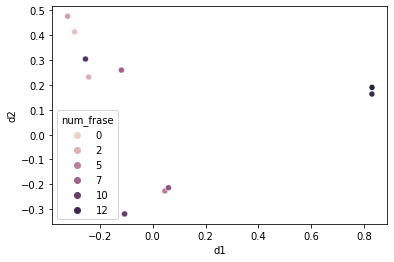

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(data=df_graficar, x='d1',y='d2',hue = 'num_frase')

## Texto a vectores word2vec

Spacy viene con un modelo pre-entrenado que tiene vectores tipo *word2vec* para una gran cantidad de frases. Veamos como funciona. 

In [31]:
### cada token tiene un booleano que nos dice si esa palabra está considerada en el dataset. En este caso, todas están. 
procesado = nlp(texto[0])

for token in procesado:
    print(token.text,token.lemma_,token.has_vector)
    
    

Quizá quizá True
porque porque True
mi mi True
niñez niñez True
sigue seguir True
jugando jugar True
en en True
tu tu True
playa playa True


In [34]:
### pero no siempre hay vectores, en este caso spaCy nos va a dar un vector de ceros. 
procesado = nlp("sdfsd sdf sd")

for token in procesado:
    print(token.text,token.lemma_,token.has_vector)
    
    

sdfsd sdfsd False
sdf sdf False
sd sd True


In [53]:
### Para ver el vector de una palabra

procesado = nlp("texto[0]")

for token in procesado:
    print(token.text,token.lemma_,token.vector)
    break
    

Quizá quizá [-2.3946     0.57158   -2.2503    -1.7437    -2.9528    -1.8124
  0.82779    1.9298    -1.438      1.0727    -1.8886     0.4899
 -2.0446    -2.7323    -1.2754    -0.52124    3.1035     1.7091
  1.2225    -0.0051969  0.017543   0.72125   -2.8112     0.46973
 -0.18026   -0.46183   -0.78701   -1.7262    -0.55919   -0.46217
 -2.2765     1.8859     1.4053     0.02792   -0.51101    0.015094
  0.33697    1.6714     2.4856    -0.63579    0.8644     0.58323
  1.0836     0.02417   -0.10392    0.81129   -1.4764     0.67265
 -0.86105    0.33893    0.89465   -1.3858    -3.2988    -0.034321
 -1.1609     3.7726     0.69608    0.038921   0.30738   -0.42766
  1.6538    -3.7173    -1.0638     0.46564    1.0503    -0.064595
 -1.7698     0.80816   -0.3701     1.4904     0.098327   2.2174
  1.432      1.0318     0.50403   -0.31847    0.47597   -0.18748
  1.9819    -1.8448     0.13876   -1.5224    -0.2527     0.26273
 -1.0378     1.6483    -1.7702     0.57526    0.181      1.2117
 -1.6858     0.

## Ejercicio 1

¿Los vectores de spaCy se calculan con las lematizaciones o con las palabras? Prueba con tres palabras, dos bien similares y otra bien distinta, y vé como se relacionan las distancias entre los vectores resultantes. 


## Llevando los embeddings a frases

Vamos a ver dos formas de llevar estos embeddings desde palabras a frases. 

Primero, tomando el vector media

In [49]:

import numpy as np

vectores_frase = np.zeros(len(procesado[0].vector))

for token in procesado: 
    vectores_frase += token.vector
vectores_frase = vectores_frase/len(texto)
vectores_frase 


array([ 0.28157086, -0.52789213, -0.30256428,  0.14393907, -0.35202572,
       -1.04344075, -1.68039213,  1.08271715,  0.82145714,  1.7148143 ,
       -1.1123736 , -0.3514993 ,  0.03554136, -0.14493214, -0.35157501,
        1.46745352,  1.20079574, -0.50041142,  1.629753  ,  0.39694629,
       -0.24818761, -1.17095538, -0.71376286, -0.16522858, -0.55824213,
       -0.07588214,  1.24486146, -0.37097786,  0.19942714,  1.84291643,
       -1.64593001,  1.25619998,  0.76410471, -0.74295714,  0.53960251,
        0.13587027,  0.39797842,  0.17507855,  1.3019    , -1.73728497,
        1.07381516,  0.10389357, -0.18372072,  0.65890359,  1.02306785,
       -1.10630291, -1.00504572,  0.78291215,  0.31069278, -0.32089642,
       -0.1038607 , -0.37094785,  0.52862643,  0.59741635, -0.35535648,
        0.21288146,  0.41751358, -0.84551494,  0.4830457 ,  0.49699928,
        0.79797742, -0.29876711, -0.54793642, -0.0455286 , -0.20272073,
        0.19724464, -0.65079645, -0.97832166,  0.60933686, -0.13

La otra es pedir el vector de la frase directo a spaCy

In [51]:
procesado = nlp(texto[0])

procesado.vector


array([ 0.43799913, -0.82116556, -0.47065544,  0.22390525, -0.54759556,
       -1.6231301 , -2.6139433 ,  1.6842266 ,  1.2778221 ,  2.667489  ,
       -1.730359  , -0.54677665,  0.05528655, -0.22545004, -0.5468944 ,
        2.2827053 ,  1.8679044 , -0.77841777,  2.5351713 ,  0.617472  ,
       -0.38606963, -1.8214861 , -1.1102978 , -0.2570222 , -0.8683767 ,
       -0.11803889,  1.9364512 , -0.5770766 ,  0.31021997,  2.8667588 ,
       -2.5603356 ,  1.9540887 ,  1.1886075 , -1.155711  ,  0.83938175,
        0.21135372,  0.61907756,  0.27234447,  2.025178  , -2.7024434 ,
        1.670379  ,  0.16161226, -0.28578776,  1.0249611 ,  1.5914389 ,
       -1.7209157 , -1.5634046 ,  1.2178633 ,  0.48329985, -0.4991722 ,
       -0.16156107, -0.57703   ,  0.82230777,  0.9293144 , -0.5527767 ,
        0.33114898,  0.6494657 , -1.3152454 ,  0.75140446,  0.7731101 ,
        1.2412982 , -0.4647488 , -0.8523456 , -0.07082229, -0.31534332,
        0.30682498, -1.0123501 , -1.5218339 ,  0.9478573 , -0.21

## Ejercicio 2

Arma dos datasets de 14 vectores, cada uno correspondiente a una frase del texto, resultantes de usar las dos formas de llevar frases a vectores que vimos acá. Usa PCR para llevar ese dataset a dos dimensiones, y visualizar, tal como lo hicimos con los vectores tf-idf. ¿Vés alguna diferencia?